In [1]:
import torch
torch.cuda.empty_cache()  

In [2]:
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 2.0.1+cu117
Torchvision version: 0.15.2+cu117
CUDA is available: True


In [3]:
#pip install folium

In [4]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:100000"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
os.getcwd()

'/home/yelhe/script/mt'

In [5]:
import glob
import shapely
from shapely.geometry import Point, Polygon
import shapely.plotting
import pandas as pd
from PIL import Image as ima
import warnings
from pathlib import Path
import pandas as pd
import pyproj
import shapefile as shp
import seaborn as sns
import geopandas as gpd
import folium

In [6]:
# read the dataset and extract location
df_raw = pd.read_excel('/home/yelhe/data/Acc/E_Trottis_Unfallbericht_2019-2022.xlsx',sheet_name=None)

In [7]:
koord = df_raw['Allgemeine Angaben'][['Unfall-Nr.','Koord E', 'Koord N']]

In [8]:
koord

,Unfall-Nr.,Koord E,Koord N
0,99900060852597,2678534,1249396
1,99900063018611,2678534,1251496
2,99900052723510,2678561,1249232
3,99900061514043,2678640,1250202
4,99900063037843,2678733,1251201
...,...,...,...
345,99900055905276,2686563,1250608
346,99900060670975,2686780,1250693
347,99900047367168,2687008,1250881
348,99900050714619,2687022,1250538


In [9]:
koordr = koord
koordr = koordr.assign(lat = None, lon = None)
koordr = koordr.assign(lon = koordr['Koord N'], lat = koordr['Koord E'])
koordr.rename(columns = {'Unfall-Nr.': 'Nr'}, inplace = True)

In [10]:
crsr={'init':'epsg:2056'}
geometryr =[Point(xy) for xy in zip(koordr['lon'], koordr['lat'])]
geodatar=gpd.GeoDataFrame(koordr, crs=crsr, geometry=geometryr)

/home/yelhe/.local/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [11]:
geodatar.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Nr        350 non-null    int64   
 1   Koord E   350 non-null    int64   
 2   Koord N   350 non-null    int64   
 3   lat       350 non-null    int64   
 4   lon       350 non-null    int64   
 5   geometry  350 non-null    geometry
dtypes: geometry(1), int64(5)
memory usage: 16.5 KB


In [12]:
# geodatar.to_json()
# kjson.to_file(, driver="GeoJSON")  

In [13]:
geodatar.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Nr        350 non-null    int64   
 1   Koord E   350 non-null    int64   
 2   Koord N   350 non-null    int64   
 3   lat       350 non-null    int64   
 4   lon       350 non-null    int64   
 5   geometry  350 non-null    geometry
dtypes: geometry(1), int64(5)
memory usage: 16.5 KB


In [14]:
# geodatar.to_file('/home/yelhe/script/mt/output/koordr.json', driver="GeoJSON")

In [15]:
koordr.head()

,Nr,Koord E,Koord N,lat,lon
0,99900060852597,2678534,1249396,2678534,1249396
1,99900063018611,2678534,1251496,2678534,1251496
2,99900052723510,2678561,1249232,2678561,1249232
3,99900061514043,2678640,1250202,2678640,1250202
4,99900063037843,2678733,1251201,2678733,1251201


In [16]:
koord = koord.assign(lat = None, lon = None)
transformer = pyproj.Transformer.from_crs("EPSG:2056", "EPSG:4326")
# a latitude; b longitude
a, b = transformer.transform(koord[['Koord E']], koord[['Koord N']])

In [17]:
koord = koord.assign(lon = b, lat = a)
koord.head()

,Unfall-Nr.,Koord E,Koord N,lat,lon
0,99900060852597,2678534,1249396,47.390709,8.478805
1,99900063018611,2678534,1251496,47.409596,8.479174
2,99900052723510,2678561,1249232,47.389231,8.479134
3,99900061514043,2678640,1250202,47.397946,8.480350
4,99900063037843,2678733,1251201,47.406919,8.481758


In [18]:
koord.rename(columns = {'Unfall-Nr.': 'Nr'}, inplace = True)

In [19]:
koord.head()

,Nr,Koord E,Koord N,lat,lon
0,99900060852597,2678534,1249396,47.390709,8.478805
1,99900063018611,2678534,1251496,47.409596,8.479174
2,99900052723510,2678561,1249232,47.389231,8.479134
3,99900061514043,2678640,1250202,47.397946,8.480350
4,99900063037843,2678733,1251201,47.406919,8.481758


In [20]:
convert_d = {'Nr' : int}
koord = koord.astype(convert_d)

In [21]:
koord.head()

,Nr,Koord E,Koord N,lat,lon
0,99900060852597,2678534,1249396,47.390709,8.478805
1,99900063018611,2678534,1251496,47.409596,8.479174
2,99900052723510,2678561,1249232,47.389231,8.479134
3,99900061514043,2678640,1250202,47.397946,8.480350
4,99900063037843,2678733,1251201,47.406919,8.481758


In [22]:
koord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Nr       350 non-null    int64  
 1   Koord E  350 non-null    int64  
 2   Koord N  350 non-null    int64  
 3   lat      350 non-null    float64
 4   lon      350 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 13.8 KB


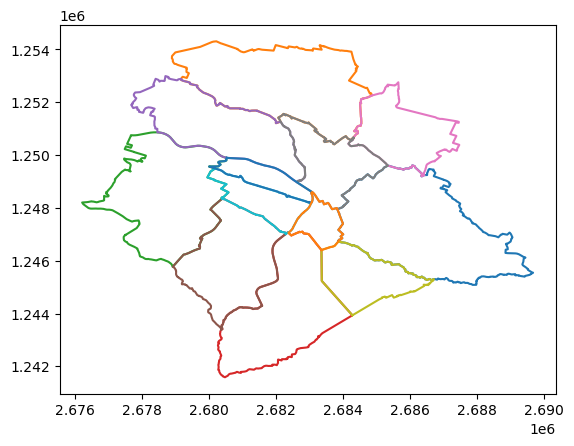

In [23]:

sf = shp.Reader('/home/yelhe/data/ch/Stadtkreis.shp')

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()


In [24]:
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(koord['lon'], koord['lat'])]
geodata=gpd.GeoDataFrame(koord, crs=crs, geometry=geometry)

/home/yelhe/.local/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [25]:
# Pseudo points
crs={'init':'epsg:4326'}
koord_rp = pd.read_csv('/home/yelhe/script/mt/output/rp_koord.csv')
geometry_rp=[Point(xy) for xy in zip(koord_rp['lon'], koord_rp['lat'])]
geodata_rp = gpd.GeoDataFrame(koord_rp, crs=crs, geometry=geometry_rp)

/home/yelhe/.local/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [26]:
# geodata.to_file('/home/yelhe/script/mt/output/koord.geojson', driver='GeoJSON')  

In [27]:
ch = gpd.read_file('/home/yelhe/data/ch/Stadtkreis.shp')


In [28]:
ch.crs

<Projected CRS: EPSG:2056>
Name: CH1903+ / LV95
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Liechtenstein; Switzerland.
- bounds: (5.96, 45.82, 10.49, 47.81)
Coordinate Operation:
- name: Swiss Oblique Mercator 1995
- method: Hotine Oblique Mercator (variant B)
Datum: CH1903+
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [29]:
ch = ch.to_crs(epsg=4326)

In [30]:
ch.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
geodata.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Nr        350 non-null    int64   
 1   Koord E   350 non-null    int64   
 2   Koord N   350 non-null    int64   
 3   lat       350 non-null    float64 
 4   lon       350 non-null    float64 
 5   geometry  350 non-null    geometry
dtypes: float64(2), geometry(1), int64(3)
memory usage: 16.5 KB


Text(32.347222222222214, 0.5, 'Latitude')

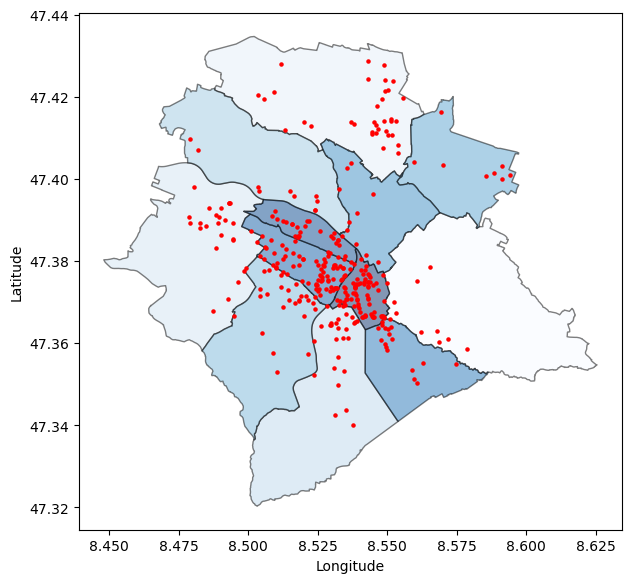

In [32]:
fig, ax = plt.subplots(figsize=(7,7))
ch.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha = 0.5,linewidth=1,cmap="Blues")

geodata.plot(ax=ax, color='red', markersize=5);

# fig.suptitle('Random locations', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')

Text(69.84722222222221, 0.5, 'Latitude')

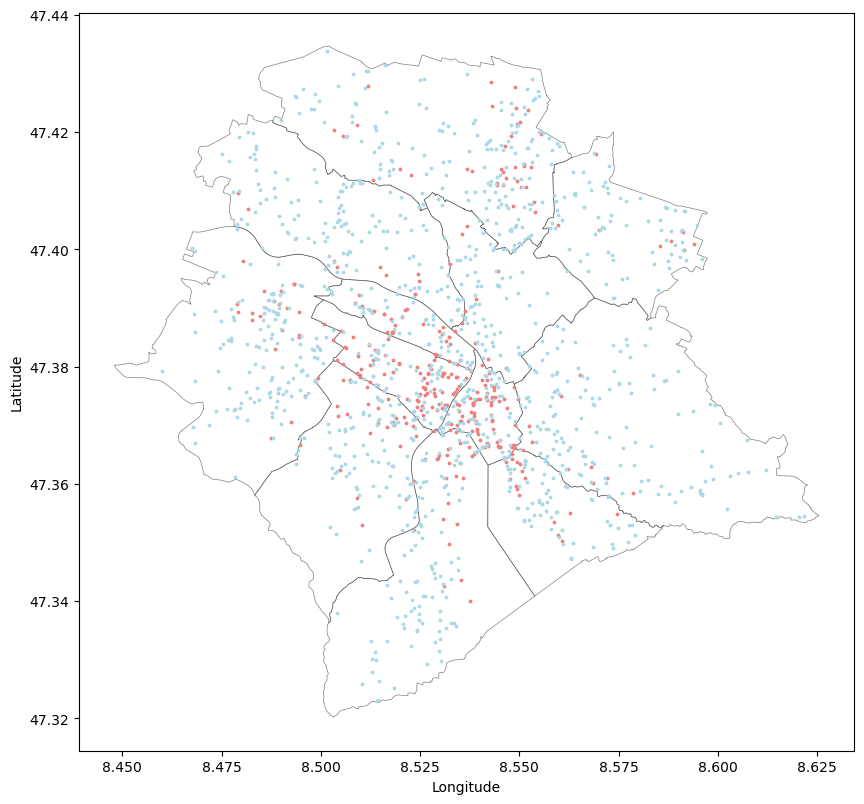

In [33]:
# Random Pseudo points map
fig, ax = plt.subplots(figsize=(10,10))
ch.plot(ax=ax, facecolor='White', edgecolor='k',alpha = 0.5,linewidth=0.5)
# cmap="Blues"
geodata.plot(ax=ax, color='lightcoral', markersize=3);
geodata_rp.plot(ax=ax, color='lightblue', markersize=3);

# fig.suptitle('Random locations', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')

In [34]:
curb  = pd.read_csv('/home/yelhe/script/mt/curb.csv')

In [35]:
curb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mask               31 non-null     int64  
 1   gmedian            31 non-null     float64
 2   rmedian            31 non-null     float64
 3   bmedian            31 non-null     float64
 4   gmean              31 non-null     float64
 5   rmean              31 non-null     float64
 6   bmean              31 non-null     float64
 7   gstd               31 non-null     float64
 8   rstd               31 non-null     float64
 9   bstd               31 non-null     float64
 10  isconvex           31 non-null     bool   
 11  area               31 non-null     float64
 12  aspect_ratio_wh_s  31 non-null     float64
 13  extent_s           31 non-null     float64
 14  solidity           31 non-null     float64
 15  aspect_ratio_wh    31 non-null     float64
 16  extent             31 non-nu

In [36]:
curb.rename(columns = {'Nr': 'Nrc'}, inplace = True)

In [37]:
#curb = curb.drop(['label'], axis=1)
convert_d = {'Nrc' : str}
curb = curb.astype(convert_d)
# curb = curb.astype('float')


In [38]:
curb['no'] = curb.Nrc.str[-1:]

In [39]:
curb['Nr'] = curb.Nrc.str[-15:-1]

In [40]:
curb.head()

,mask,gmedian,rmedian,bmedian,gmean,rmean,bmean,gstd,rstd,bstd,...,extent,ed,ratio_ell,perimeter,is_cen_inside,is_mce_inside,Nrc,label,no,Nr
0,37,136.0,137.0,134.0,134.012319,133.723621,130.664167,40.583695,40.455490,39.941001,...,0.553211,33.520649,27.305327,420.149276,1.0,1.0,999000608525971,curb,1,99900060852597
1,43,146.0,145.0,141.0,144.754717,144.268505,140.157475,17.221874,17.422036,17.144202,...,0.206126,39.323650,2.051900,385.889390,-1.0,-1.0,999000608525971,curb,1,99900060852597
2,38,147.0,116.0,145.0,144.381842,113.368491,141.754339,36.137713,36.565911,37.018719,...,0.676940,28.277101,25.889252,254.911687,1.0,1.0,999000527235101,curb,1,99900052723510
3,11,97.0,96.0,100.0,98.405529,97.829451,101.500544,15.845957,16.355386,16.633390,...,0.571356,105.863376,13.401971,695.494508,1.0,1.0,999000466623001,curb,1,99900046662300
4,12,200.0,177.0,206.0,182.715519,166.655640,187.292581,38.612772,41.268839,37.897827,...,0.736828,126.421277,42.909823,1384.658942,1.0,1.0,999000601646161,curb,1,99900060164616


In [41]:
convert_d = {'Nr' : int}
curb = curb.astype(convert_d)

In [42]:
curb_loc = pd.merge(curb, koord, on = 'Nr')

In [43]:
curb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mask               31 non-null     int64  
 1   gmedian            31 non-null     float64
 2   rmedian            31 non-null     float64
 3   bmedian            31 non-null     float64
 4   gmean              31 non-null     float64
 5   rmean              31 non-null     float64
 6   bmean              31 non-null     float64
 7   gstd               31 non-null     float64
 8   rstd               31 non-null     float64
 9   bstd               31 non-null     float64
 10  isconvex           31 non-null     bool   
 11  area               31 non-null     float64
 12  aspect_ratio_wh_s  31 non-null     float64
 13  extent_s           31 non-null     float64
 14  solidity           31 non-null     float64
 15  aspect_ratio_wh    31 non-null     float64
 16  extent             31 non-nu

In [44]:
curb_loc

,mask,gmedian,rmedian,bmedian,gmean,rmean,bmean,gstd,rstd,bstd,...,is_cen_inside,is_mce_inside,Nrc,label,no,Nr,Koord E,Koord N,lat,lon
0,37,136.0,137.0,134.0,134.012319,133.723621,130.664167,40.583695,40.455490,39.941001,...,1.0,1.0,999000608525971,curb,1,99900060852597,2678534,1249396,47.390709,8.478805
1,43,146.0,145.0,141.0,144.754717,144.268505,140.157475,17.221874,17.422036,17.144202,...,-1.0,-1.0,999000608525971,curb,1,99900060852597,2678534,1249396,47.390709,8.478805
2,34,134.0,134.0,132.0,123.580189,122.729363,120.767099,44.923330,44.850885,44.492533,...,1.0,1.0,999000608525972,curb,2,99900060852597,2678534,1249396,47.390709,8.478805
3,38,147.0,116.0,145.0,144.381842,113.368491,141.754339,36.137713,36.565911,37.018719,...,1.0,1.0,999000527235101,curb,1,99900052723510,2678561,1249232,47.389231,8.479134
4,37,190.0,166.0,206.0,182.622540,158.833631,198.942755,28.576588,27.630113,29.788826,...,1.0,1.0,999000527235102,curb,2,99900052723510,2678561,1249232,47.389231,8.479134
5,24,197.0,176.0,213.0,184.124786,162.343590,199.958974,31.732210,31.523697,32.157279,...,1.0,1.0,999000527235103,curb,3,99900052723510,2678561,1249232,47.389231,8.479134
6,25,198.5,176.0,209.0,185.300414,164.210635,197.111878,36.484390,34.720299,37.153890,...,1.0,1.0,999000527235103,curb,3,99900052723510,2678561,1249232,47.389231,8.479134
7,11,97.0,96.0,100.0,98.405529,97.829451,101.500544,15.845957,16.355386,16.633390,...,1.0,1.0,999000466623001,curb,1,99900046662300,2678978,1249165,47.388579,8.484644
8,12,200.0,177.0,206.0,182.715519,166.655640,187.292581,38.612772,41.268839,37.897827,...,1.0,1.0,999000601646161,curb,1,99900060164616,2679220,1246860,47.367820,8.487441
9,32,193.0,165.0,205.0,180.088928,152.537053,191.454228,37.369837,34.047881,37.639139,...,1.0,1.0,999000601646162,curb,2,99900060164616,2679220,1246860,47.367820,8.487441


In [45]:
curb_r  = pd.read_csv('/home/yelhe/script/mt/r_curb.csv')
curb_r.rename(columns = {'Nr': 'Nrc'}, inplace = True)
convert_d = {'Nrc' : str}
curb_r = curb_r.astype(convert_d)
curb_r['no'] = curb_r.Nrc.str[-1:]
curb_r['Nr'] = curb_r.Nrc.str[-15:-1]
convert_d1 = {'Nr' : int}
curb_r = curb_r.astype(convert_d1)
# curb_r

In [46]:
curb_loc_r = pd.merge(curb_r, koord, on = 'Nr')

/home/yelhe/.local/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/yelhe/.local/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Text(32.347222222222214, 0.5, 'Latitude')

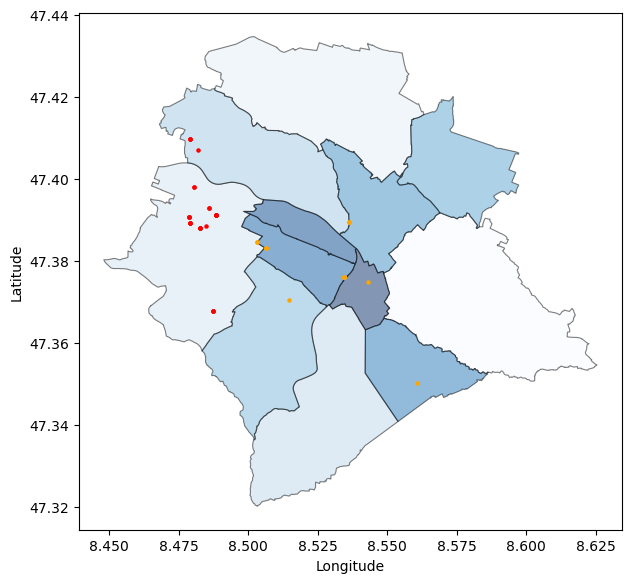

In [47]:
crs={'init':'epsg:4326'}
geometry_c=[Point(xy) for xy in zip(curb_loc['lon'], curb_loc['lat'])]
geodata_c=gpd.GeoDataFrame(curb_loc, crs=crs, geometry=geometry_c)
geometry_cr = [Point(xy) for xy in zip(curb_loc_r['lon'], curb_loc_r['lat'])]
geodata_cr = gpd.GeoDataFrame(curb_loc_r, crs = crs, geometry = geometry_cr)
# geodata_c.plot()
#ch = gpd.read_file('/home/yelhe/data/ch/Stadtkreis.shp')
fig, ax = plt.subplots(figsize=(7,7))
ch.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha = 0.5,linewidth=0.8,cmap="Blues")

geodata_c.plot(ax=ax, color='red', markersize=5);
geodata_cr.plot(ax = ax, color = 'orange', markersize = 5);

# fig.suptitle('Random locations', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')

### Predicted result

In [112]:
koord_rp_n = pd.read_csv('/home/yelhe/script/mt/output/rp_koord_new.csv')

In [79]:
apl = pd.read_csv('/home/yelhe/script/mt/output/pred_accident_label.csv')
ppl = pd.read_csv('/home/yelhe/script/mt/output/pred_pseudo_label.csv')

In [80]:
apl['Nr']=apl['Nr'].values.astype(str)

In [81]:
apl['id'] = apl.Nr.str[-15:-1]
apl['dir'] = apl.Nr.str[-1]
apl.head()

,mask,gmedian,rmedian,bmedian,gmean,rmean,bmean,gstd,rstd,bstd,...,is_cen_inside,is_mce_inside,leftm,rightm,topm,bottomm,Nr,p,id,dir
0,2,121.0,118.0,119.0,125.207882,121.692088,123.851176,28.212500,28.467390,27.957547,...,1.0,1.0,288,604,367,534,999000608525971,1,99900060852597,1
1,5,115.0,117.0,111.0,113.090287,114.524478,109.461159,17.588751,17.982858,16.838046,...,1.0,-1.0,410,639,326,507,999000608525971,1,99900060852597,1
2,10,94.0,96.0,95.0,91.169697,92.868687,92.220202,41.142859,41.026044,41.540755,...,1.0,1.0,476,498,339,370,999000608525971,2,99900060852597,1
3,11,87.0,88.0,82.0,84.442393,85.419498,80.549483,43.046229,42.829707,42.759670,...,1.0,1.0,573,631,346,387,999000608525971,2,99900060852597,1
4,13,81.0,71.0,87.0,78.882353,69.506641,84.679317,31.403619,30.753063,32.285485,...,1.0,1.0,362,456,381,415,999000608525971,2,99900060852597,1


In [85]:
ppl['Nr']= ppl['Nr'].values.astype(str)
ppl['Nr'] = ppl['Nr'].str.zfill(5)

In [86]:
ppl['Nr']

0        00021
1        00021
2        00021
3        00021
4        00021
         ...  
75667    09944
75668    09944
75669    09944
75670    09944
75671    09944
Name: Nr, Length: 75672, dtype: object

In [87]:
ppl['id'] = ppl.Nr.str[-5:-1]
ppl['dir'] = ppl.Nr.str[-1]

In [90]:
gapl = apl.groupby(['id','dir', 'p']).size().reset_index().rename(columns={0:'count'})
gppl = ppl.groupby(['id','dir', 'p']).size().reset_index().rename(columns={0:'count'})

In [91]:
gppl

,id,dir,p,count
0,0002,1,1,7
1,0002,1,2,13
2,0002,1,3,1
3,0002,2,1,3
4,0002,2,2,24
...,...,...,...,...
7751,0994,3,1,3
7752,0994,3,2,9
7753,0994,4,1,2
7754,0994,4,2,11


In [94]:
koord['Nr'] = koord['Nr'].values.astype(str)

In [96]:
koord.rename(columns = {'Nr':'id'}, inplace = True) 

In [97]:
gaplk = pd.merge(gapl, koord, on = ['id'])

In [114]:
koord_rp_n['id'] = koord_rp_n['id'].values.astype(str)
koord_rp_n['id'] = koord_rp_n['id'].str.zfill(4)

In [116]:
gpplk = pd.merge(gppl, koord_rp_n, on = ['id'])

In [121]:
gpplk = gpplk.drop(['url1', 'url2','url3','url4'], axis = 1)

In [122]:
gpplk.head()

,id,dir,p,count,x,y,lat,lon
0,0002,1,1,7,2.684125e+06,1.245559e+06,47.355511,8.552124
1,0002,1,2,13,2.684125e+06,1.245559e+06,47.355511,8.552124
2,0002,1,3,1,2.684125e+06,1.245559e+06,47.355511,8.552124
3,0002,2,1,3,2.684125e+06,1.245559e+06,47.355511,8.552124
4,0002,2,2,24,2.684125e+06,1.245559e+06,47.355511,8.552124


In [123]:
gaplk.head()

,id,dir,p,count,Koord E,Koord N,lat,lon
0,99900044963840,1,1,2,2683419,1247907,47.376718,8.543221
1,99900044963840,1,2,26,2683419,1247907,47.376718,8.543221
2,99900044963840,2,1,1,2683419,1247907,47.376718,8.543221
3,99900044963840,2,2,36,2683419,1247907,47.376718,8.543221
4,99900044963840,2,3,1,2683419,1247907,47.376718,8.543221


In [124]:
gaplk_c = gaplk.loc[gaplk['p'] == 0]
gpplk_c = gpplk.loc[gpplk['p'] == 0]


In [139]:
len(gpplk_c['id'].unique())

470

In [127]:
gaplk_c.to_csv('/home/yelhe/script/mt/output/pred_curb_accident.csv', index = False)
gpplk_c.to_csv('/home/yelhe/script/mt/output/pred_curb_pseudo.csv', index = False)

In [141]:
# Predicted curb in accident points summary
cas = gaplk_c.groupby(['id','p']).size().reset_index().rename(columns={0:'count'})
# Predicted curb in pseudo points summary
cps = gpplk_c.groupby(['id','p']).size().reset_index().rename(columns={0:'count'})

In [142]:
cask = pd.merge(cas, koord, on = ['id'])
cpsk = pd.merge(cps, koord_rp_n, on = ['id'])

In [143]:
cask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       150 non-null    object 
 1   p        150 non-null    int64  
 2   count    150 non-null    int64  
 3   Koord E  150 non-null    int64  
 4   Koord N  150 non-null    int64  
 5   lat      150 non-null    float64
 6   lon      150 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 8.3+ KB


In [145]:
len(cask['id'].unique())

150

In [152]:
cask['count'].describe()

count    150.000000
mean       1.446667
std        0.719215
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: count, dtype: float64

In [146]:
geometry_ca =[Point(xy) for xy in zip(cask['lon'], cask['lat'])]
geodata_ca = gpd.GeoDataFrame(cask, crs=crs, geometry=geometry_ca)
geometry_cp =[Point(xy) for xy in zip(cpsk['lon'], cpsk['lat'])]
geodata_cp = gpd.GeoDataFrame(cpsk, crs=crs, geometry=geometry_cp)


/home/yelhe/.local/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/yelhe/.local/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [171]:
geometry_rpn =[Point(xy) for xy in zip(koord_rp_n['lon'], koord_rp_n['lat'])]
geodata_rpn = gpd.GeoDataFrame(koord_rp_n, crs=crs, geometry=geometry_rpn)

/home/yelhe/.local/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Text(69.84722222222221, 0.5, 'Latitude')

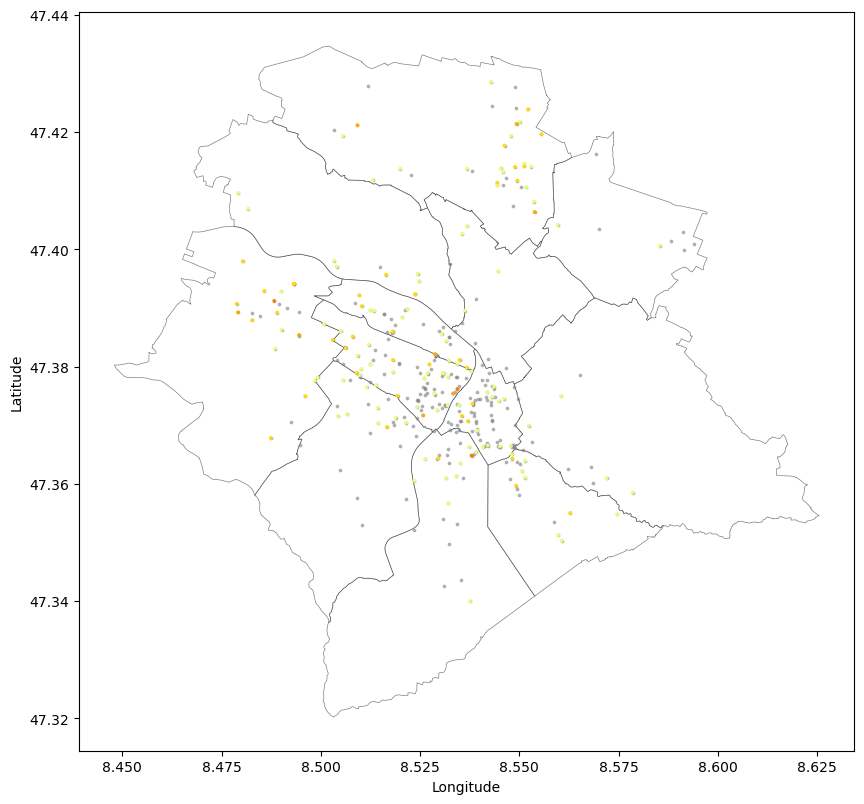

In [174]:
# Random Pseudo points map
fig, ax = plt.subplots(figsize=(10,10))
ch.plot(ax=ax, facecolor='White', edgecolor='k',alpha = 0.5,linewidth=0.5)

geodata.plot(ax=ax, color='grey', alpha = 0.5,  markersize=3 );
# geodata_rp.plot(ax=ax, color='lightblue', markersize=3);
geodata_ca.plot(ax=ax, markersize=3, column='count', cmap = 'Wistia');
# geodata_cp.plot(ax=ax, color='blue', markersize=3);


# fig.suptitle('Random locations', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')

Text(69.84722222222221, 0.5, 'Latitude')

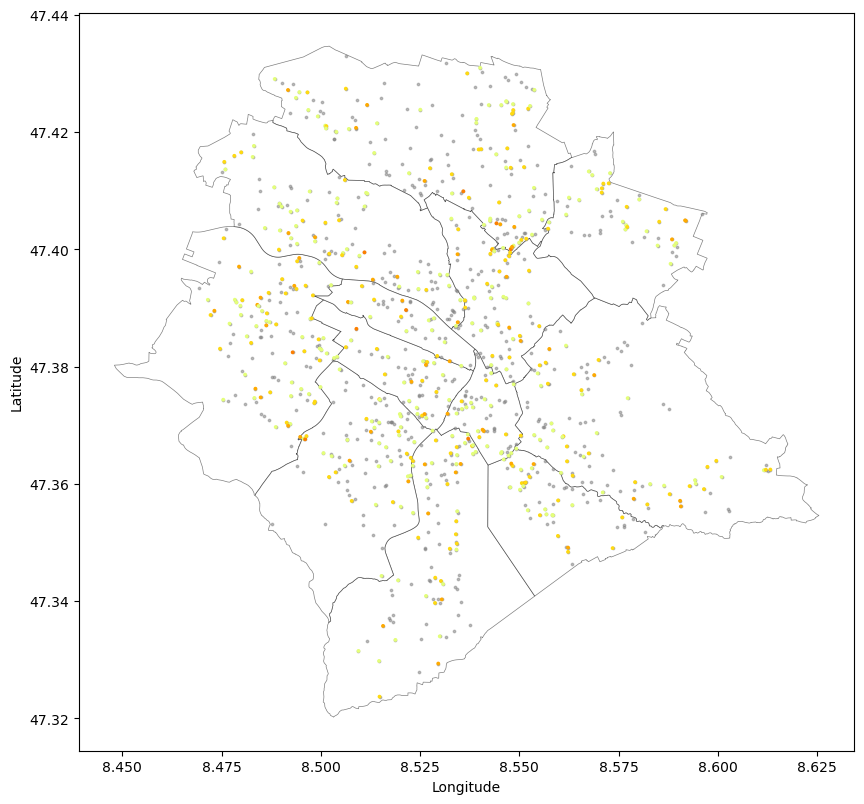

In [175]:
# Random Pseudo points map
fig, ax = plt.subplots(figsize=(10,10))
ch.plot(ax=ax, facecolor='White', edgecolor='k',alpha = 0.5,linewidth=0.5)

# geodata.plot(ax=ax, color='grey', alpha = 0.5,  markersize=3, );
geodata_rpn.plot(ax=ax, color='grey', alpha = 0.5, markersize=3);
# geodata_ca.plot(ax=ax, markersize=3, column='count', cmap = 'Reds');
geodata_cp.plot(ax=ax, column='count', cmap = 'Wistia',  markersize=3);


# fig.suptitle('Random locations', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')